In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df.drop('Name',axis='columns',inplace=True)
df['Income'] = df['Income($)']
df.drop('Income($)',axis='columns',inplace=True)
df.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


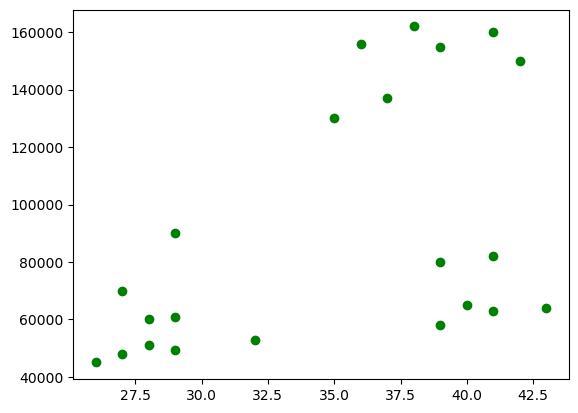

In [3]:
plt.scatter(df.Age,df.Income,color='green')

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [6]:
df['cluster'] = y_predicted
df.head()

,Age,Income,cluster
0,27,70000,1
1,29,90000,1
2,29,61000,2
3,28,60000,2
4,42,150000,0


In [7]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

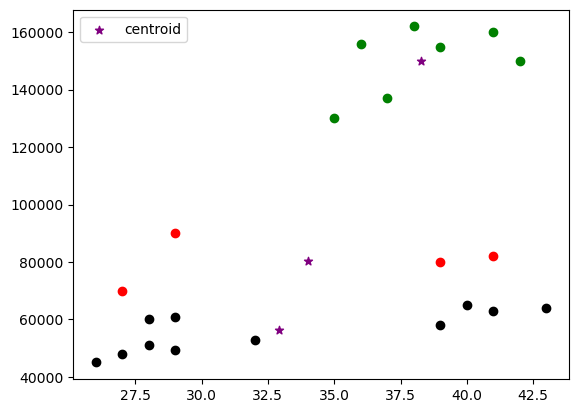

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [9]:
# scaling both parameter for better graph
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

sc.fit(df[['Income']])
df['sc_income'] = sc.fit_transform(df[['Income']])

sc.fit(df[['Age']])
df['sc_age'] = sc.fit_transform(df[['Age']])

df.head()

,Age,Income,cluster,sc_income,sc_age
0,27,70000,1,0.213675,0.058824
1,29,90000,1,0.384615,0.176471
2,29,61000,2,0.136752,0.176471
3,28,60000,2,0.128205,0.117647
4,42,150000,0,0.897436,0.941176


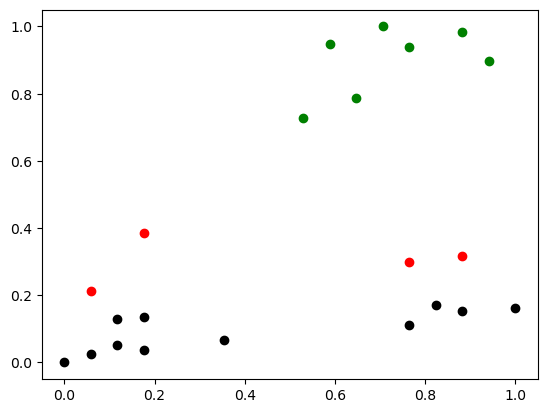

In [10]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['sc_age'],df1['sc_income'],color='green')
plt.scatter(df2['sc_age'],df2['sc_income'],color='red')
plt.scatter(df3['sc_age'],df3['sc_income'],color='black')


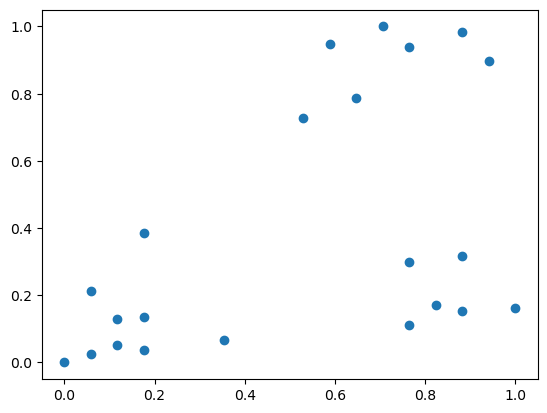

In [11]:
plt.scatter(df['sc_age'],df['sc_income'])

In [12]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['sc_age','sc_income']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [13]:
df['cluster1'] = y_predicted
df.head()

,Age,Income,cluster,sc_income,sc_age,cluster1
0,27,70000,1,0.213675,0.058824,1
1,29,90000,1,0.384615,0.176471,1
2,29,61000,2,0.136752,0.176471,1
3,28,60000,2,0.128205,0.117647,1
4,42,150000,0,0.897436,0.941176,0


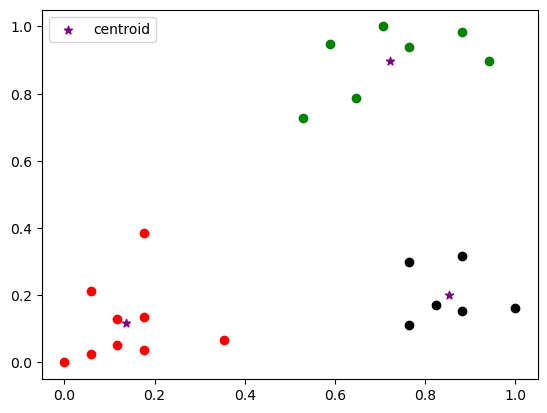

In [14]:
df1 = df[df.cluster1==0]
df2 = df[df.cluster1==1]
df3 = df[df.cluster1==2]

plt.scatter(df1['sc_age'],df1['sc_income'],color='green')
plt.scatter(df2['sc_age'],df2['sc_income'],color='red')
plt.scatter(df3['sc_age'],df3['sc_income'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

### Finding k of kmeans by Elbow method

In [15]:
# finding best k in 1 to 10 
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sc_age','sc_income']])
    sse.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


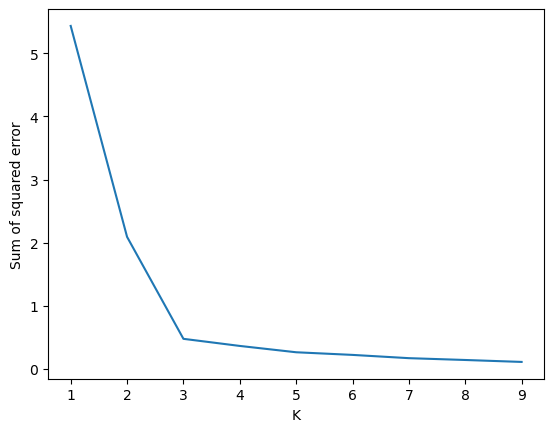

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### graph showing that k=3 will best for clustering 
#### ( figure out optimal value of k)